# Heart Disease Prediction Model #
## Author: Madison Little ##
## Date: Sep. 4, 2024 ##
This project utilizes a dataset from the World Health Organization to train a model for predicting likelihood of a patient developing heart disease.

The project outline and sample data was provided by Dataquest. The implementation and observations are purely my own.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart_disease_prediction.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
print(f"Features: {len(df.columns)}")
print(f"Observations: {len(df)}")

Features: 12
Observations: 918


In [4]:
# Cast the following binary fields from int to string so they are treated as categorical values
df['FastingBS'] = df['FastingBS'].astype('str')
df['HeartDisease'] = df['HeartDisease'].astype('str')

In [5]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918,918,918.000000,918,918.000000,918,918
unique,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,3,2
top,NaN,M,ASY,NaN,NaN,0,Normal,NaN,N,NaN,Flat,1
freq,NaN,725,496,NaN,NaN,704,552,NaN,547,NaN,460,508
mean,53.510893,NaN,NaN,132.396514,198.799564,NaN,NaN,136.809368,NaN,0.887364,NaN,NaN
std,9.432617,NaN,NaN,18.514154,109.384145,NaN,NaN,25.460334,NaN,1.066570,NaN,NaN
min,28.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,NaN
25%,47.000000,NaN,NaN,120.000000,173.250000,NaN,NaN,120.000000,NaN,0.000000,NaN,NaN
50%,54.000000,NaN,NaN,130.000000,223.000000,NaN,NaN,138.000000,NaN,0.600000,NaN,NaN
75%,60.000000,NaN,NaN,140.000000,267.000000,NaN,NaN,156.000000,NaN,1.500000,NaN,NaN


## Observations ##
Patient ages range from 28 to 77, with a mean of about 53 years.

It appears that RestingBP and Cholesterol have missing values, as their minimums are 0.0--a value that does not make sense for those measurements.

MaxHR is more ambiguous.  There is a minimum value of 60BPM, but the lower quartile is 120BPM. This may mean that 60 is a placeholder value for unrecorded heartrate. If these heartrates were achieved during exercise, it is unlikley that 60BPM was a recorded value.

The cholesterol column has a max value of 603, which is 2.5 times larger than what is considered "high" cholesterol.  Based on the IQR, this is an extreme outlier.  According to the American Heart Association, such a cholesterol level is caused by a rare genetic disease called familial hypercholesterolemia.

There are more male patients represented in the data than female patients (~80% men)



Text(0, 0.5, 'Count of Patients')

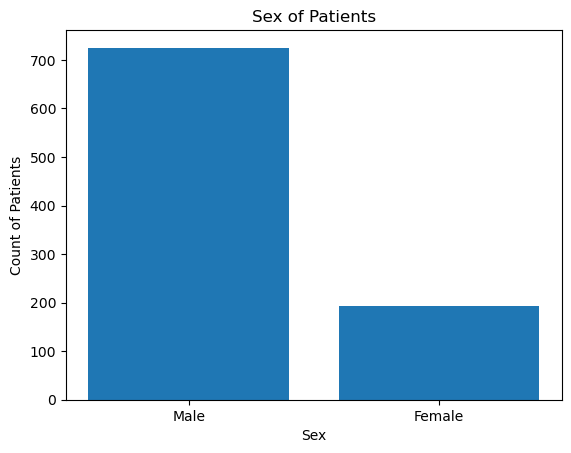

In [54]:
mapping = {'M': 'Male', 'F': 'Female'}

data = df['Sex'].replace(mapping).value_counts().to_dict()

plt.bar(data.keys(), data.values())
plt.title('Sex of Patients')
plt.xlabel('Sex')
plt.ylabel('Count of Patients')


In [ ]:
mapping = {'0': 'Negative', '1': 'Positive'}
data = df['ChestPainType'].replace(mapping).value_counts().to_dict()

plt.bar(data.keys(), data.values())
plt.title('Heart Disease in Patients')
plt.xlabel('Test Result for Heart Disease')
plt.ylabel('Count of Patients')

Text(0, 0.5, 'Count of Patients')

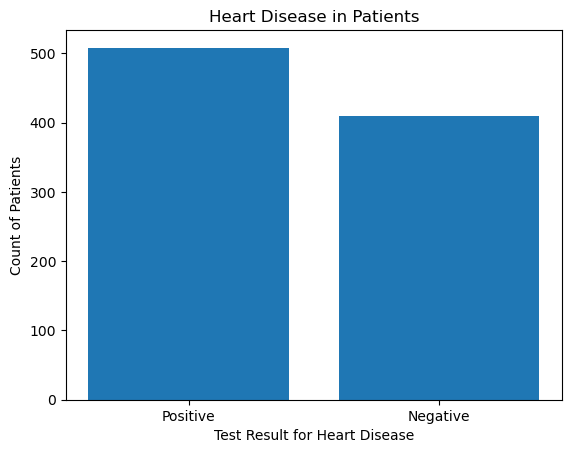

In [53]:
mapping = {'0': 'Negative', '1': 'Positive'}
data = df['HeartDisease'].replace(mapping).value_counts().to_dict()

plt.bar(data.keys(), data.values())
plt.title('Heart Disease in Patients')
plt.xlabel('Test Result for Heart Disease')
plt.ylabel('Count of Patients')
